<a href="https://colab.research.google.com/github/sonalisanjeevprabu18/Large-Language-Models/blob/main/LLM_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


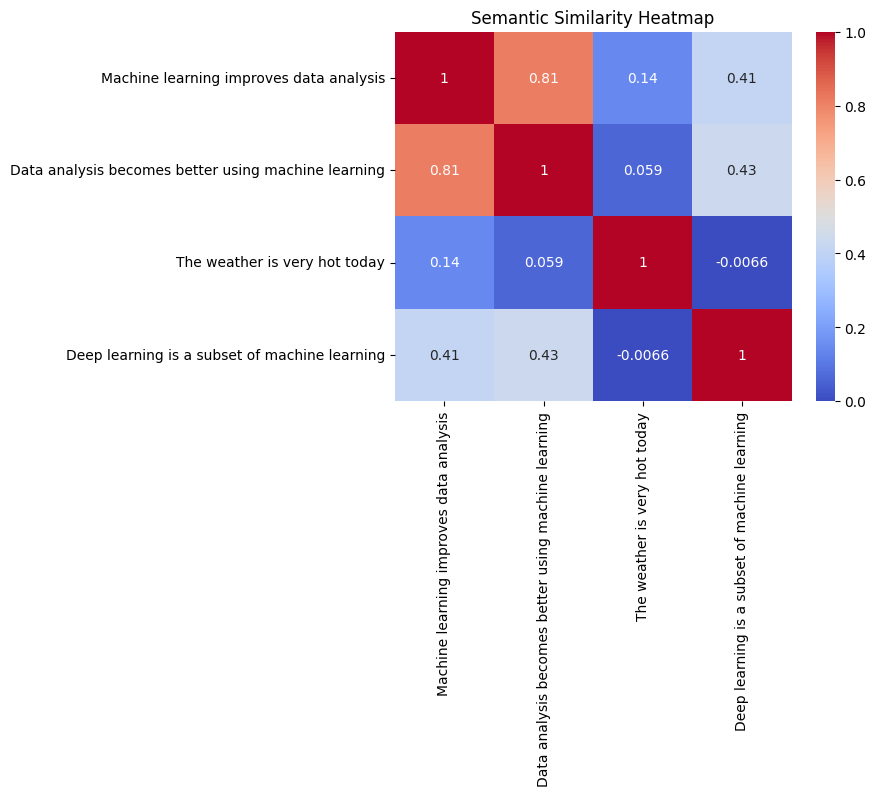

In [1]:
# Install libraries
!pip install transformers torch scikit-learn matplotlib seaborn
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
# Load pre-trained model
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model.eval()
# Input sentences
sentences = [
    "Machine learning improves data analysis",
    "Data analysis becomes better using machine learning",
    "The weather is very hot today",
    "Deep learning is a subset of machine learning"
]
# Tokenize
inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
# Generate embeddings
with torch.no_grad():
    outputs = model(**inputs)
# Mean pooling
embeddings = outputs.last_hidden_state.mean(dim=1)
# Compute similarity matrix
similarity_matrix = cosine_similarity(embeddings)
#  VISUALIZATION
plt.figure()
sns.heatmap(
    similarity_matrix,
    xticklabels=sentences,
    yticklabels=sentences,
    annot=True,
    cmap="coolwarm",
    vmin=0,
    vmax=1
)
plt.title("Semantic Similarity Heatmap")
plt.show()
